# Mouse Maze 

A maze solved with 3 different levels of information.

1. MDP
2. POMDP
3. No state information

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import kruskal

%load_ext autoreload
%autoreload 2

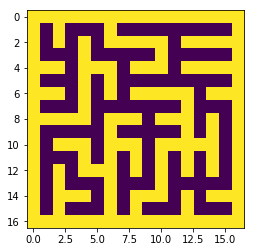

In [71]:
class Maze():    
    
    def __init__(self, width, height):
        self.width = width
        self.height = height        
        self.tile = np.zeros((width, height))
    
    def generate_random(self, seed=None):
        """ generate a random maze using kruskals algorithm"""
        
        assert self.width >= 3 and \
            self.height >= 3 and \
            self.width % 2 == 1 and \
            self.height % 2 == 1, \
            "Width and height must be >=3 and odd."
        
        if seed is not None:
            np.random.seed(seed)
            
        # The idea is to use kruskals with random weights on a smaller grid then expand the grid out
        # so that there are rooms for the walls inbetween the tiles.
            
        h_width = self.width // 2
        h_height = self.height // 2
            
        g = kruskal.Graph(h_width*h_height)

        def in_bounds(x,y):
            return x >= 0 and y >= 0 and x < h_width and y < h_height

        def add_edge(g,x1,y1,x2,y2, cost):
            if in_bounds(x1,y1) and in_bounds(x2,y2):
                g.addEdge(x1+y1*h_width, x2+y2*h_width, cost)
                g.addEdge(x2+y2*h_width, x1+y1*h_width, cost)        

        deltas = [(0,-1),(0,+1),(-1,0),(+1,0)]                

        for x in range(h_width):
            for y in range(h_height):
                for dx,dy in deltas:
                    add_edge(g,x,y,x+dx,y+dy,np.random.randint(1,10))

        graph = g.KruskalMST()
        
        self.tile = np.ones((self.width, self.height))
        
        # fill in rooms
        for x in range(h_width):
            for y in range(h_height):
                self.tile[x*2+1,y*2+1] = 0
        
        # convert from graph to walls 
        for head,tail,weight in graph:
            x1, y1 = head % h_width, head // h_width
            x2, y2 = tail % h_width, tail // h_width
            dx = x2-x1
            dy = y2-y1                        
            self.tile[x1*2+1+dx,y1*2+1+dy] = 0        
        
    
    def plot(self):
        """ plot the maze. """        
        plt.imshow(self.tile)
        plt.show()

maze = Maze(17,17)
maze.generate_random(5)
maze.plot()